In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os.path

%matplotlib inline
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/latex'
plt.rc('text', usetex=True)

In [62]:
def draw_scaling_lines(input_csvname, ax, ylim = []):
    df = pd.read_csv(input_csvname + '.csv', delimiter=',')
    
    from itertools import cycle
    linecycler = cycle(["-","--","-.",":"])
    markercycler = cycle(['o', 'v', 'D', 'd', 'p', 's'])
    
    lines = []
    for column in df.columns:
        if 'input' == column: continue;
        if 'thread number' == column: continue;    
        lines.append(ax.plot(df[column], linestyle = next(linecycler), marker = next(markercycler), \
                             markersize=15, linewidth=5))
    
    
    # associate each tick with thread number
    if [] != ylim:
        ax.set_ylim(ylim)
    #ax.set_xticklabels(df['thread number'])
    #from matplotlib.ticker import FormatStrFormatter
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
    
    
    return df.columns, lines;

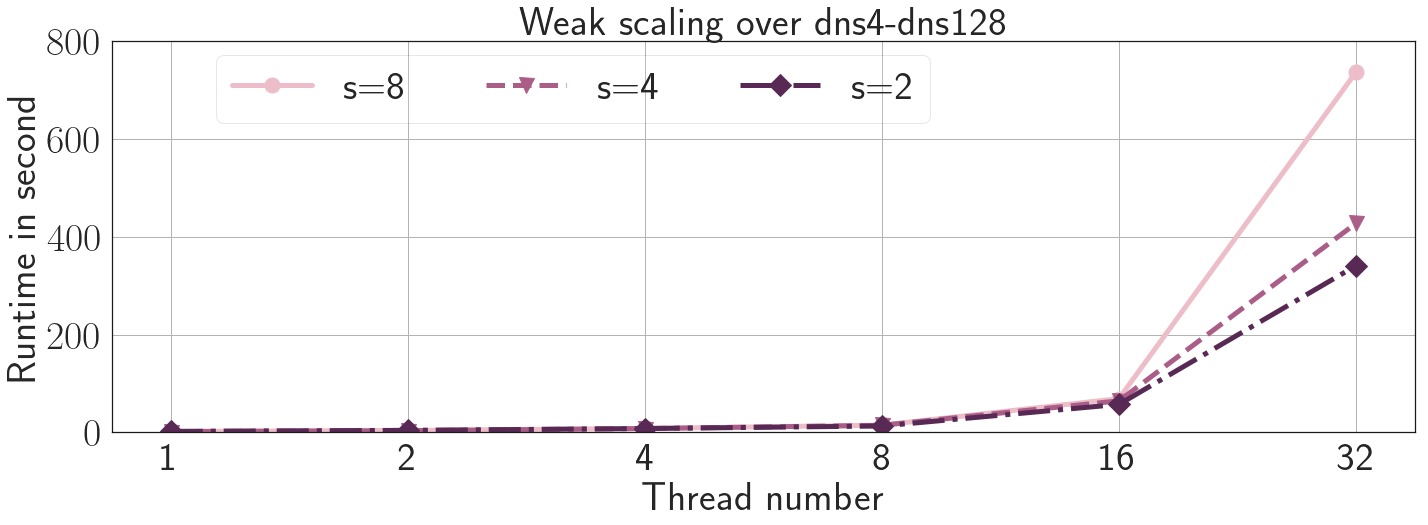

In [63]:
def draw_all_scaling_lines():
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=3, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    
    xaxis_tick = [0, 1, 2, 3, 4, 5]
    xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    
    ax1.set_title('Weak scaling over dns4-dns128', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Runtime in second', fontsize = font_size)
    ax1.set_xlabel('Thread number', fontsize = font_size)
    ax1.set_xticklabels(xaxis_range, rotation=0) 
    ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    columns, lines1 = draw_scaling_lines('weak_scaling_dns4-64', ax1, [0,800])

    
    
    leg = fig.legend(ax1.lines, columns[2:], ncol = 3, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, bbox_to_anchor = (0.66, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig('weak_scaling.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig('weak_scaling.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

draw_all_scaling_lines()

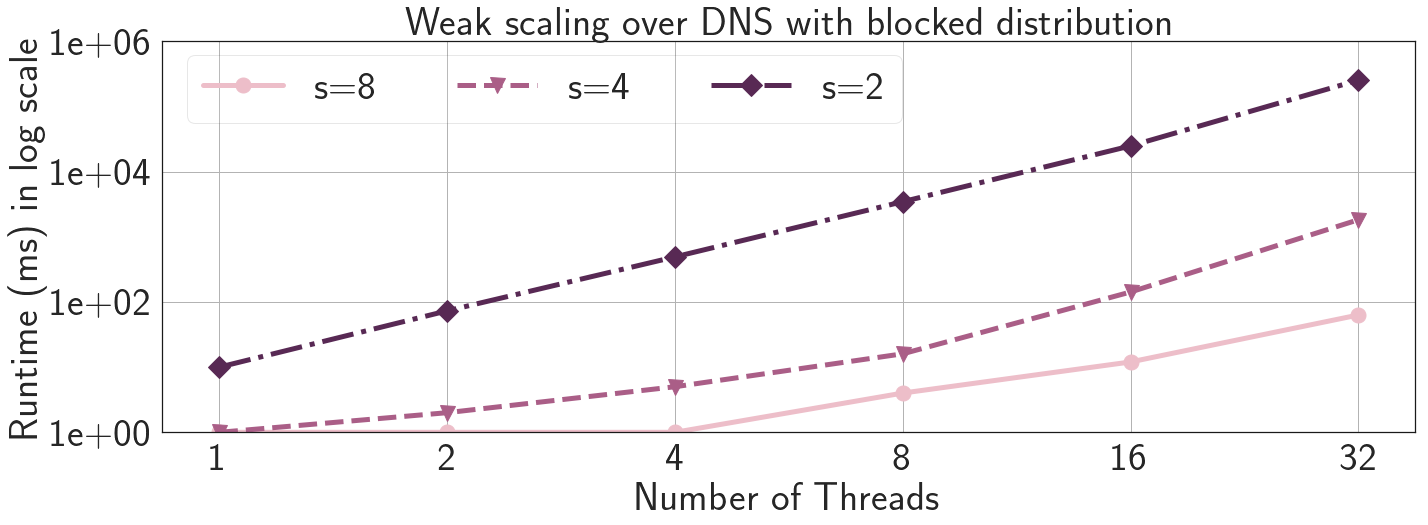

In [64]:
def draw_all_scaling_lines():
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=3, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    
    xaxis_tick = [0, 1, 2, 3, 4, 5]
    xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    ax1 = plt.subplot(111)
    
    ax1.set_title('Weak scaling over DNS with blocked distribution', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Runtime (ms) in log scale', fontsize = font_size)
    ax1.set_xlabel('Number of Threads', fontsize = font_size)
    ax1.set_xticklabels(xaxis_range, rotation=0) 
    ax1.set_yscale('log')
    
    from matplotlib import ticker
    formatter = ticker.ScalarFormatter(useMathText=False)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((0,6)) 
    ax1.get_yaxis().set_major_formatter(formatter)
    ax1.tick_params(labelsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.e'))

    columns, lines1 = draw_scaling_lines('weak_scaling_dns4-128-mapblocked', ax1, [0,1000000])

    
    
    leg = fig.legend(ax1.lines, columns[2:], ncol = 3, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, bbox_to_anchor = (0.64, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig('weak_scaling_mapblocked.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig('weak_scaling_mapblocked.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

draw_all_scaling_lines()

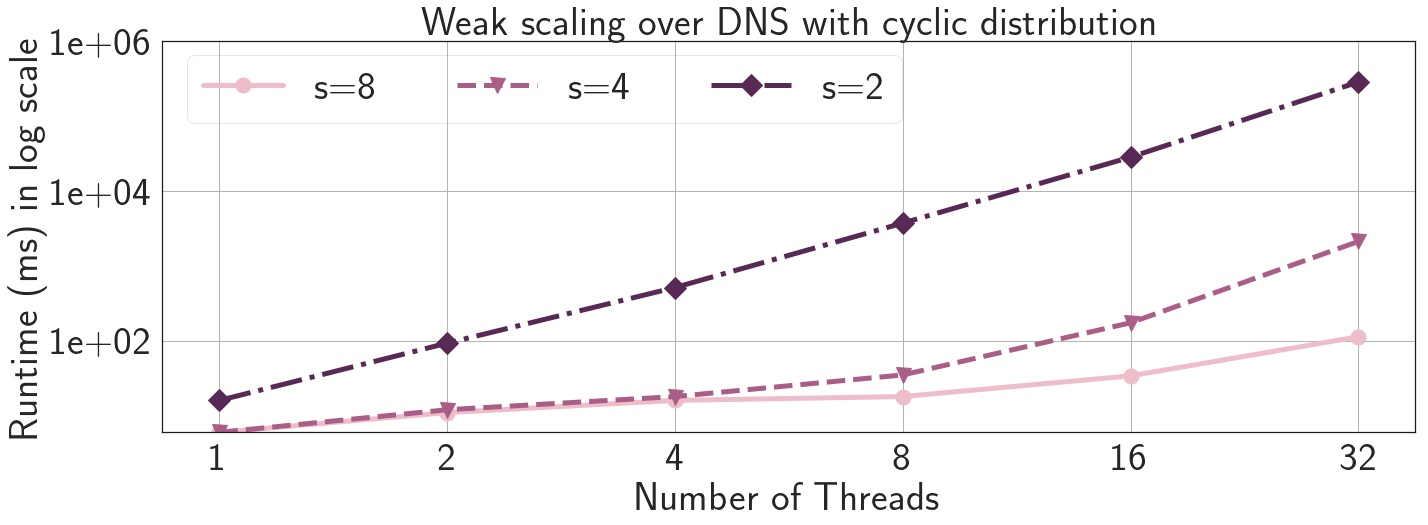

In [65]:
def draw_all_scaling_lines():
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=3, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    
    xaxis_tick = [0, 1, 2, 3, 4, 5]
    xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    
    ax1.set_title('Weak scaling over DNS with cyclic distribution', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Runtime (ms) in log scale', fontsize = font_size)
    ax1.set_xlabel('Number of Threads', fontsize = font_size)
    ax1.set_xticklabels(xaxis_range, rotation=0) 
    ax1.set_yscale('log')
    
    from matplotlib import ticker
    formatter = ticker.ScalarFormatter(useMathText=False)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((0,6)) 
    ax1.get_yaxis().set_major_formatter(formatter)
    ax1.tick_params(labelsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.e'))
    
    columns, lines1 = draw_scaling_lines('weak_scaling_dns4-128-mapcyclic', ax1, [0,1000000])

    
    
    leg = fig.legend(ax1.lines, columns[2:], ncol = 3, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, bbox_to_anchor = (0.64, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig('weak_scaling_mapcyclic.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig('weak_scaling_mapcyclic.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

draw_all_scaling_lines()